# Rain prediction

## Metadata

- Date: The date of observation 
- Location: The common name of the location of the weather station
- MinTemp: The minimum temperature in degrees celsius
- MaxTemp: The maximum temperature in degrees celsius
- Rainfall: The amount of rainfall recorded for the day in mm
- Evaporation: The so-called Class A pan evaporation (mm) in the 24 hours to 9am
- Sunshine: The number of hours of bright sunshine in the day.
- WindGustDir: The direction of the strongest wind gust in the 24 hours to midnight
- WindGustSpeed: The speed (km/h) of the strongest wind gust in the 24 hours to midnight
- WindDir9am: Direction of the wind at 9am
- WindDir3pm: Direction of the wind at 3pm
- WindSpeed9am: Wind speed (km/hr) averaged over 10 minutes prior to 9am
- WindSpeed3pm: Wind speed (km/hr) averaged over 10 minutes prior to 3pm
- Humidity9am: Humidity (percent) at 9am
- Humidity3pm: Humidity (percent) at 3pm
- Pressure9am: Atmospheric pressure (hpa) reduced to mean sea level at 9am
- Pressure3pm: Atmospheric pressure (hpa) reduced to mean sea level at 3pm
- Cloud9am: Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many 
- Cloud3pm: Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
- Temp9am: Temperature (degrees C) at 9am
- Temp3pm: Temperature (degrees C) at 3pm
- RainToday: Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
- RainTomorrow: This column is Yes if the rain for that day was 1mm or more.

In [14]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-dawn.mplstyle -P /tmp
plt.style.use("/tmp/rose-pine-dawn.mplstyle")

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


OSError: '/tmp/rose-pine-dawn.mplstyle' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

## DATA COLLECTION

In [ ]:
rain_data = pd.read_csv('/work/rain_data.csv')

## QUICK LOOK AT DATA STRUCTURE

In [ ]:
def data_explore(dataframe):
    print("DATA EXPLORATION")
    print('*'*70)
    print("Shape of dataset : ",dataframe.shape)
    print('*'*70)
    print(dataframe.info())
    print('*'*70)
    print("STATISTICAL ANALYSIS OF NUMERICAL DATA")
    print('*'*70)
    print(dataframe.describe().T)
    print('*'*70)
    print("STATISTICAL ANALYSIS OF CATEGORICAL DATA")
    print('*'*70)
    print(dataframe.describe(exclude = ['float', 'int64']).T)
    print('*'*70)
    print("MISSING VALUES")
    print('*'*70)
    print(dataframe.isna().sum().sort_values(ascending=False))
    print('*'*70)
    print("MISSING VALUES IN %")
    print('*'*70)
    print(round(100* (dataframe.isnull().sum() / len(dataframe)).sort_values(ascending=False),2))
    print('*'*70)
    

In [ ]:
data_explore(rain_data)

DATA EXPLORATION
**********************************************************************
Shape of dataset :  (67021, 23)
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67021 entries, 0 to 67020
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           67021 non-null  object 
 1   Location       67021 non-null  object 
 2   MinTemp        65864 non-null  float64
 3   MaxTemp        65940 non-null  float64
 4   Rainfall       64271 non-null  float64
 5   Evaporation    37591 non-null  float64
 6   Sunshine       34831 non-null  float64
 7   WindGustDir    61534 non-null  object 
 8   WindGustSpeed  61576 non-null  float64
 9   WindDir9am     62270 non-null  object 
 10  WindDir3pm     64733 non-null  object 
 11  WindSpeed9am   65971 non-null  float64
 12  WindSpeed3pm   65328 non-null  float64
 13  Humidity9am    65257 non-null  floa

array([[<AxesSubplot: title={'center': 'MinTemp'}>,
        <AxesSubplot: title={'center': 'MaxTemp'}>,
        <AxesSubplot: title={'center': 'Rainfall'}>,
        <AxesSubplot: title={'center': 'Evaporation'}>],
       [<AxesSubplot: title={'center': 'Sunshine'}>,
        <AxesSubplot: title={'center': 'WindGustSpeed'}>,
        <AxesSubplot: title={'center': 'WindSpeed9am'}>,
        <AxesSubplot: title={'center': 'WindSpeed3pm'}>],
       [<AxesSubplot: title={'center': 'Humidity9am'}>,
        <AxesSubplot: title={'center': 'Humidity3pm'}>,
        <AxesSubplot: title={'center': 'Pressure9am'}>,
        <AxesSubplot: title={'center': 'Pressure3pm'}>],
       [<AxesSubplot: title={'center': 'Cloud9am'}>,
        <AxesSubplot: title={'center': 'Cloud3pm'}>,
        <AxesSubplot: title={'center': 'Temp9am'}>,
        <AxesSubplot: title={'center': 'Temp3pm'}>]], dtype=object)

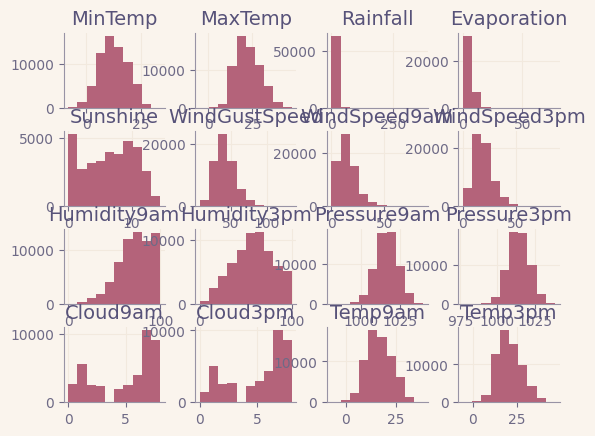

In [ ]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

rain_data.hist()

### Erase instances where we dont have the target

In [ ]:
rain_data_new = rain_data.dropna(subset = ["RainTomorrow"])

In [ ]:
rain_data_new["RainTomorrow"].isnull().sum()

0

In [ ]:
rain_data = rain_data_new.copy()

Observations:

- Missings: 4 features with more than 37% Missings.

- Categorical variables: Turn Date into months\/seasons, cities intro countries\/ranking of raining countries..

- Numerical: Clouds multimodal, log to rainfall evaporation 

- Outliers: Rainfall, evaporation!!

- Encoding good!

- Balanced target!

## CREATE TEST SET

In [ ]:
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(
    rain_data, test_size=0.2, stratify=rain_data["RainTomorrow"], random_state=42)

In [ ]:
df = strat_train_set.copy()

## EXPLORATORY DATA ANALYSIS(EDA)

In [ ]:
data_explore(df)

DATA EXPLORATION
**********************************************************************
Shape of dataset :  (51003, 23)
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
Index: 51003 entries, 66813 to 14746
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           51003 non-null  object 
 1   Location       51003 non-null  object 
 2   MinTemp        50749 non-null  float64
 3   MaxTemp        50890 non-null  float64
 4   Rainfall       50290 non-null  float64
 5   Evaporation    28965 non-null  float64
 6   Sunshine       26816 non-null  float64
 7   WindGustDir    47393 non-null  object 
 8   WindGustSpeed  47426 non-null  float64
 9   WindDir9am     47648 non-null  object 
 10  WindDir3pm     49512 non-null  object 
 11  WindSpeed9am   50491 non-null  float64
 12  WindSpeed3pm   49979 non-null  float64
 13  Humidity9am    50286 non-null  float

array([[<AxesSubplot: title={'center': 'MinTemp'}>,
        <AxesSubplot: title={'center': 'MaxTemp'}>,
        <AxesSubplot: title={'center': 'Rainfall'}>,
        <AxesSubplot: title={'center': 'Evaporation'}>],
       [<AxesSubplot: title={'center': 'Sunshine'}>,
        <AxesSubplot: title={'center': 'WindGustSpeed'}>,
        <AxesSubplot: title={'center': 'WindSpeed9am'}>,
        <AxesSubplot: title={'center': 'WindSpeed3pm'}>],
       [<AxesSubplot: title={'center': 'Humidity9am'}>,
        <AxesSubplot: title={'center': 'Humidity3pm'}>,
        <AxesSubplot: title={'center': 'Pressure9am'}>,
        <AxesSubplot: title={'center': 'Pressure3pm'}>],
       [<AxesSubplot: title={'center': 'Cloud9am'}>,
        <AxesSubplot: title={'center': 'Cloud3pm'}>,
        <AxesSubplot: title={'center': 'Temp9am'}>,
        <AxesSubplot: title={'center': 'Temp3pm'}>]], dtype=object)

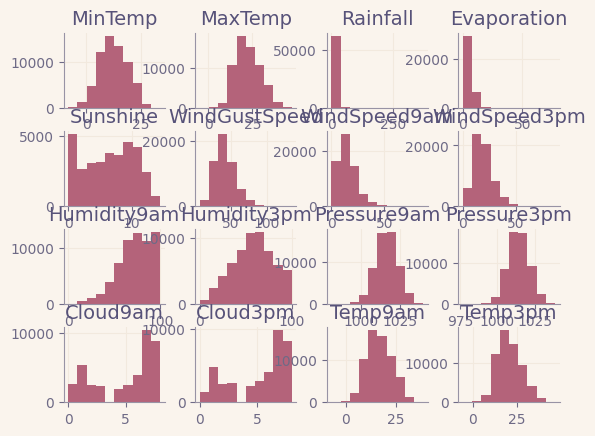

In [ ]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

rain_data.hist()

In [ ]:
cat_cols=[i for i in df.columns if df.dtypes[i]=='object']
num_cols = [i for i in df.columns if df.dtypes[i]!='object']
target = "RainTomorrow"

### Target EDA

In [ ]:
mapping = {'Yes': 1, 'No': 0}
df['RainToday'] = df['RainToday'].map(mapping)
df['RainTomorrow'] = df['RainTomorrow'].map(mapping)

In [ ]:
def plot_target(df: pd.DataFrame, col: str, title: str, pie_colors:list) -> None:
    fig, ax = plt.subplots(1,2,figsize=(15, 6), width_ratios=[2,1])

    textprops={'fontsize': 12, 'weight': 'bold',"color": "black"}
    ax[0].pie(df[col].value_counts().to_list(),
            colors=pie_colors,
            labels=df[col].value_counts().index.to_list(),
            autopct='%1.f%%', 
            explode=([.05]*df[col].nunique()),
            pctdistance=0.5,
            wedgeprops={'linewidth' : 1, 'edgecolor' : 'black'}, 
            textprops=textprops)

    sns.countplot(x = col, data=df, palette = "pastel6", order=df[col].value_counts().to_dict().keys())
    for p, count in enumerate(df[col].value_counts().to_dict().values(),0):
        ax[1].text(p-0.1, count+(np.sqrt(count)), count, color='black', fontsize=13)
    plt.setp(ax[1].get_xticklabels(), fontweight="bold")
    plt.yticks([])
    plt.box(False)
    fig.suptitle(x=0.56, t=f'► {title} Distribution ◄', fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()

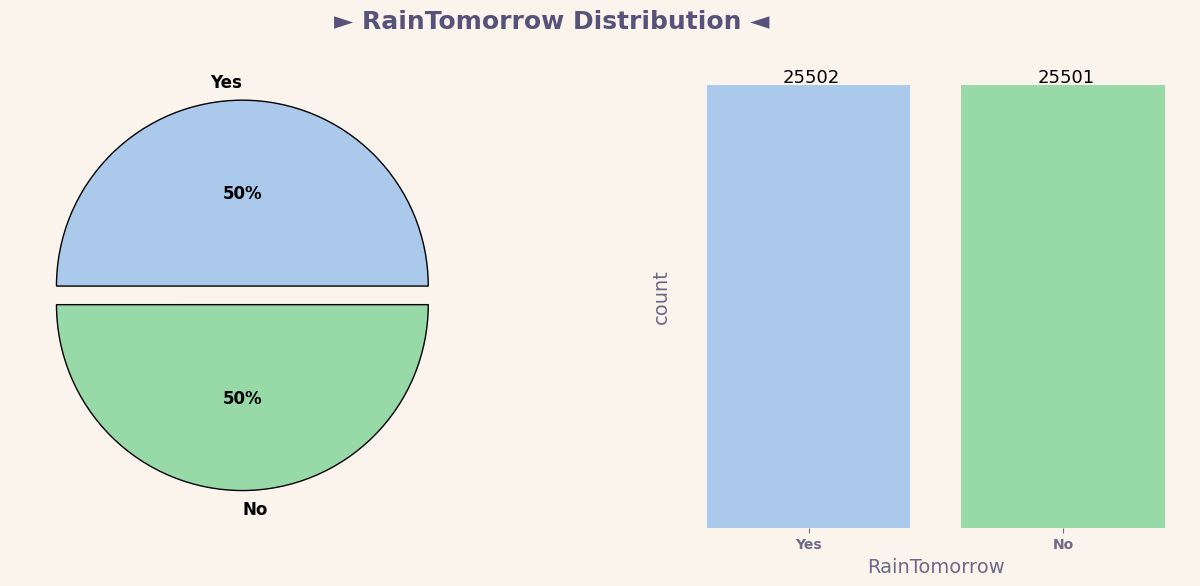

In [ ]:
plot_target(df, 
            col=target, 
            title=target, 
            pie_colors=["#abc9ea","#98daa7","#f3aba8","#d3c3f7","#f3f3af","#c0ebe9"])

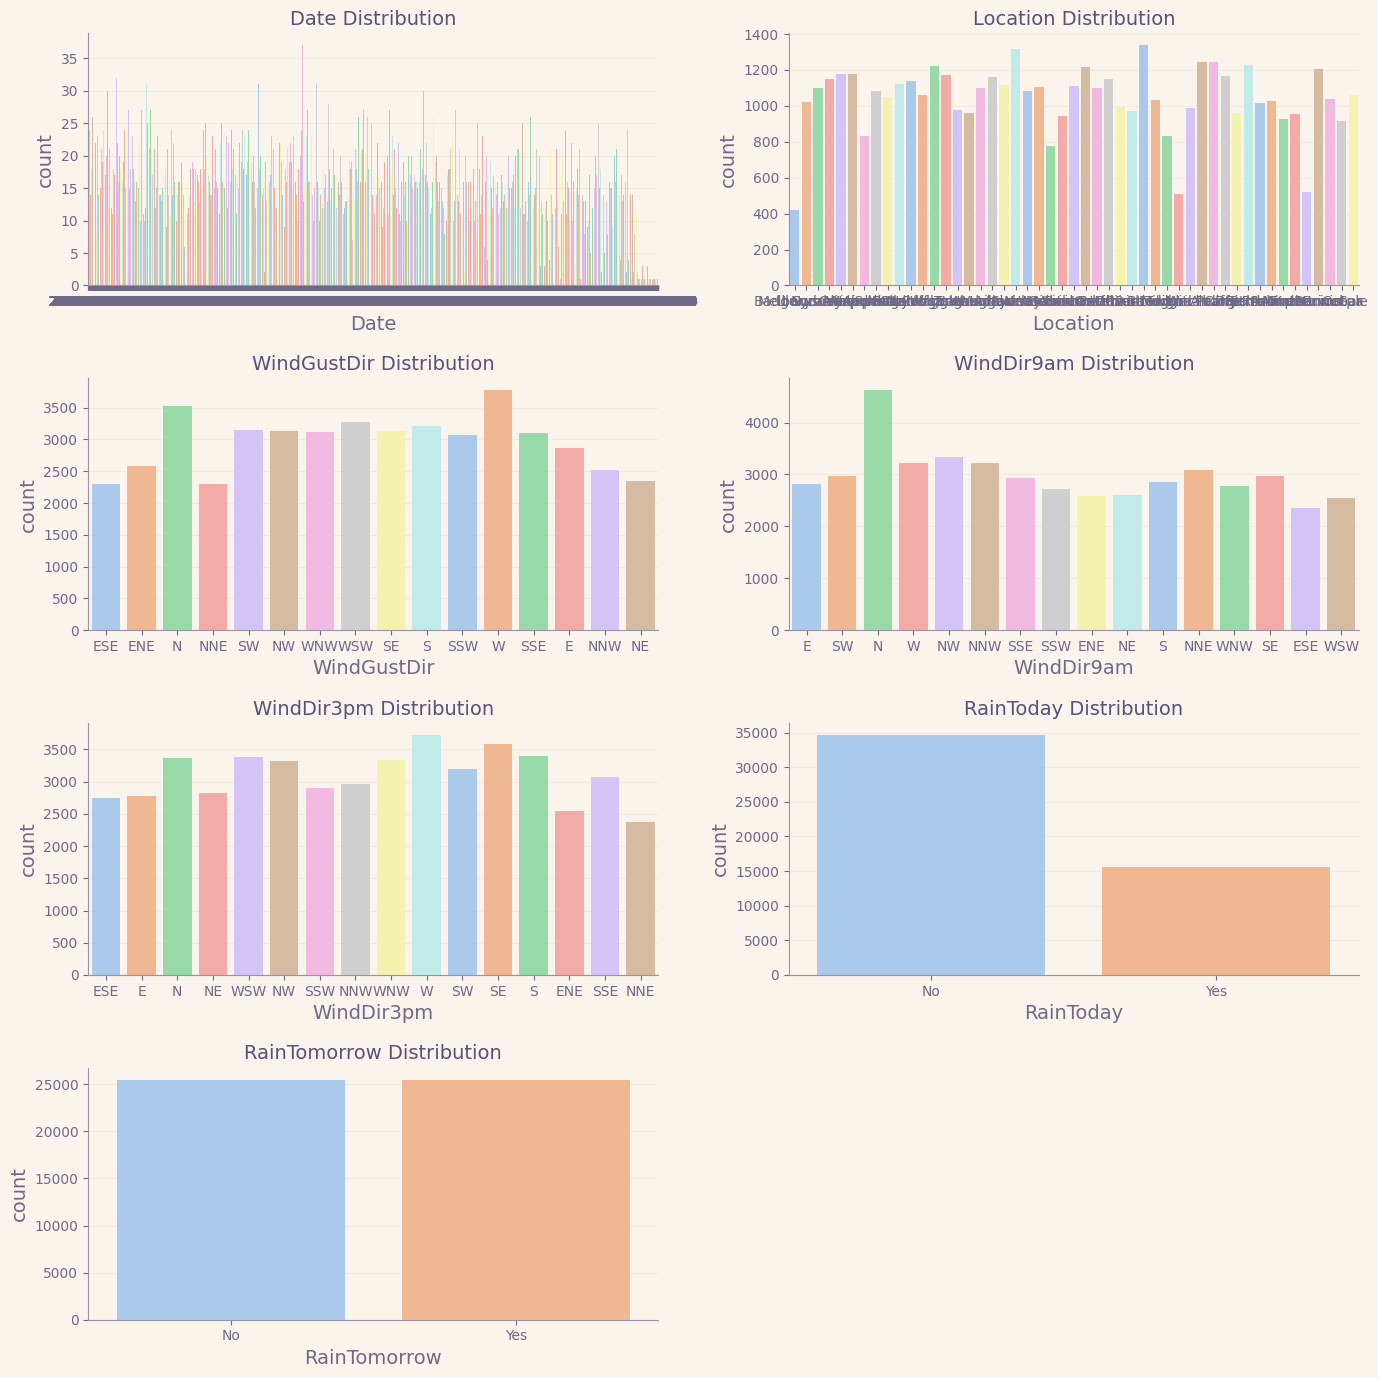

In [ ]:
plt.figure(figsize=(14,len(cat_cols)*2))
for idx,column in enumerate(cat_cols):
    plt.subplot(len(cat_cols)//2+1,2,idx+1)
    sns.countplot(x=column, data=df,palette="pastel")
    plt.title(f"{column} Distribution")
    plt.tight_layout()
    
plt.savefig("dist_cat")  
plt.show()

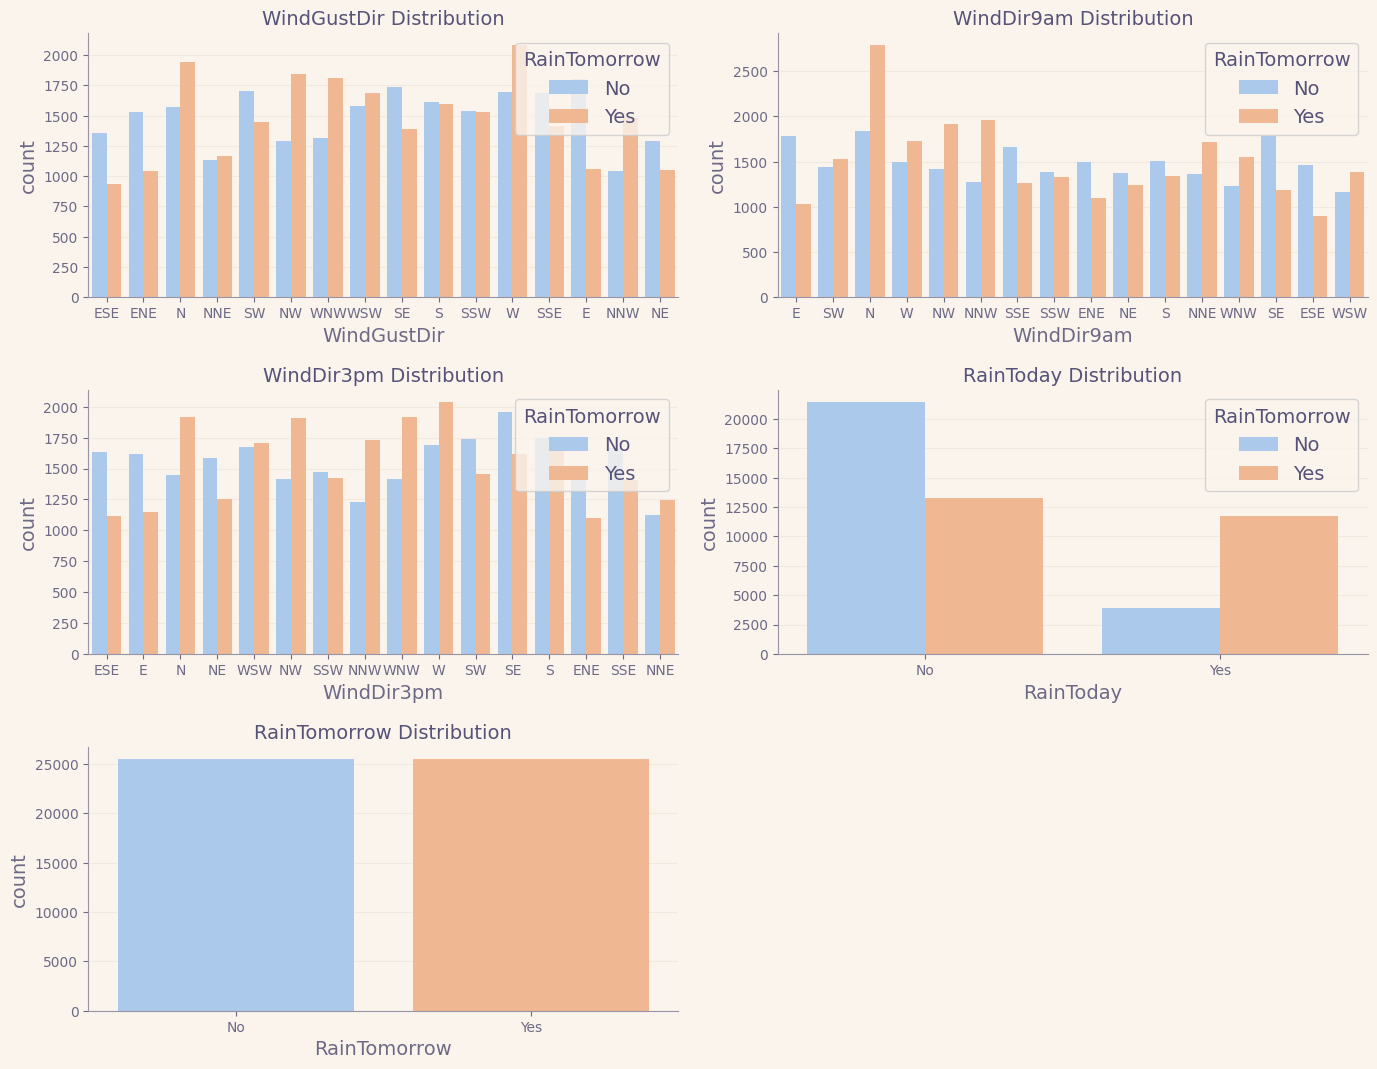

In [ ]:
plt.figure(figsize=(14,len(cat_cols)*2))
for idx,column in enumerate(cat_cols[2:]):
    plt.subplot(len(cat_cols)//2+1,2,idx+1)
    sns.countplot(x=column, hue=target, data=df.drop(columns = ["Date","Location"]),palette="pastel")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

## Numerical columns

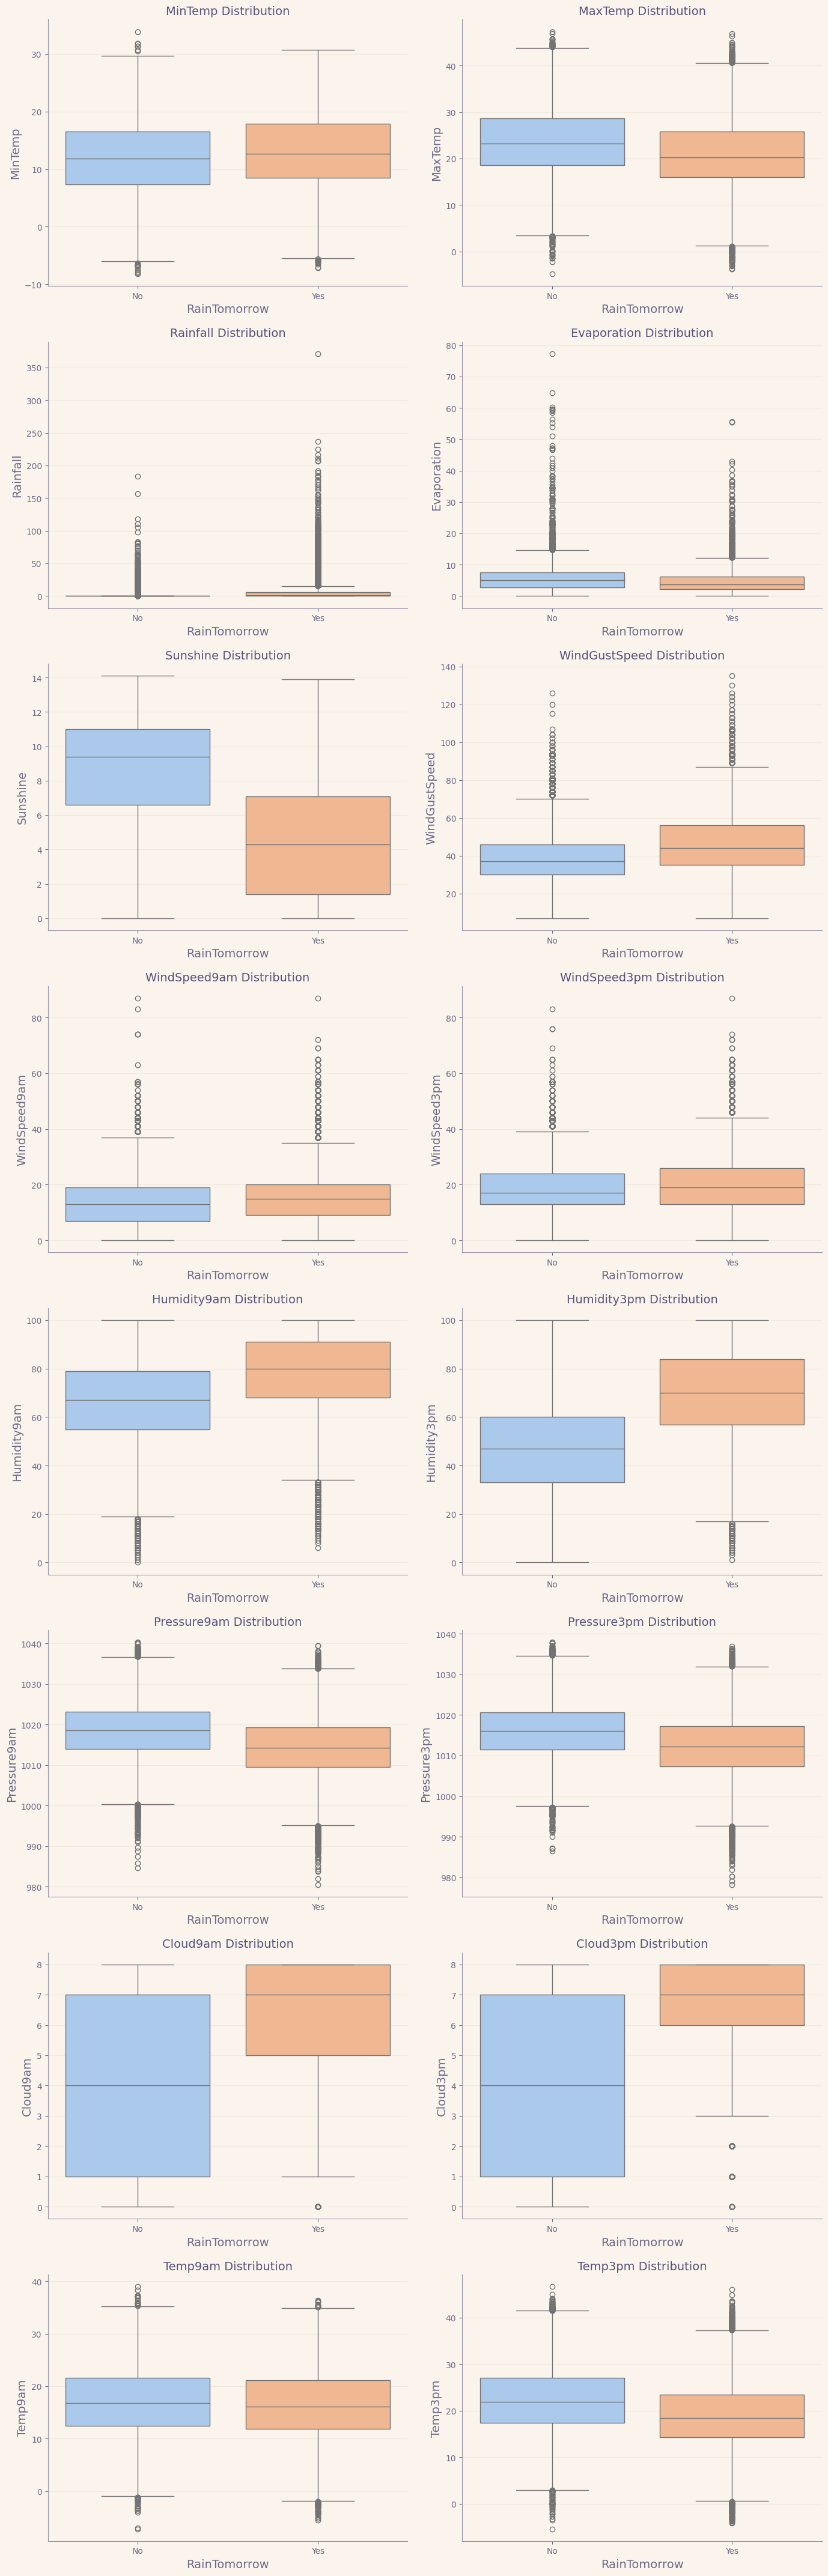

In [ ]:
plt.figure(figsize=(14,len(num_cols)*3))
for idx,column in enumerate(num_cols):
    plt.subplot(len(num_cols)//2+1,2,idx+1)
    sns.boxplot(x=target, y=column, data=df,palette="pastel")
    plt.title(f"{column} Distribution")
    plt.tight_layout()
    
plt.savefig("box_num")  
plt.show()

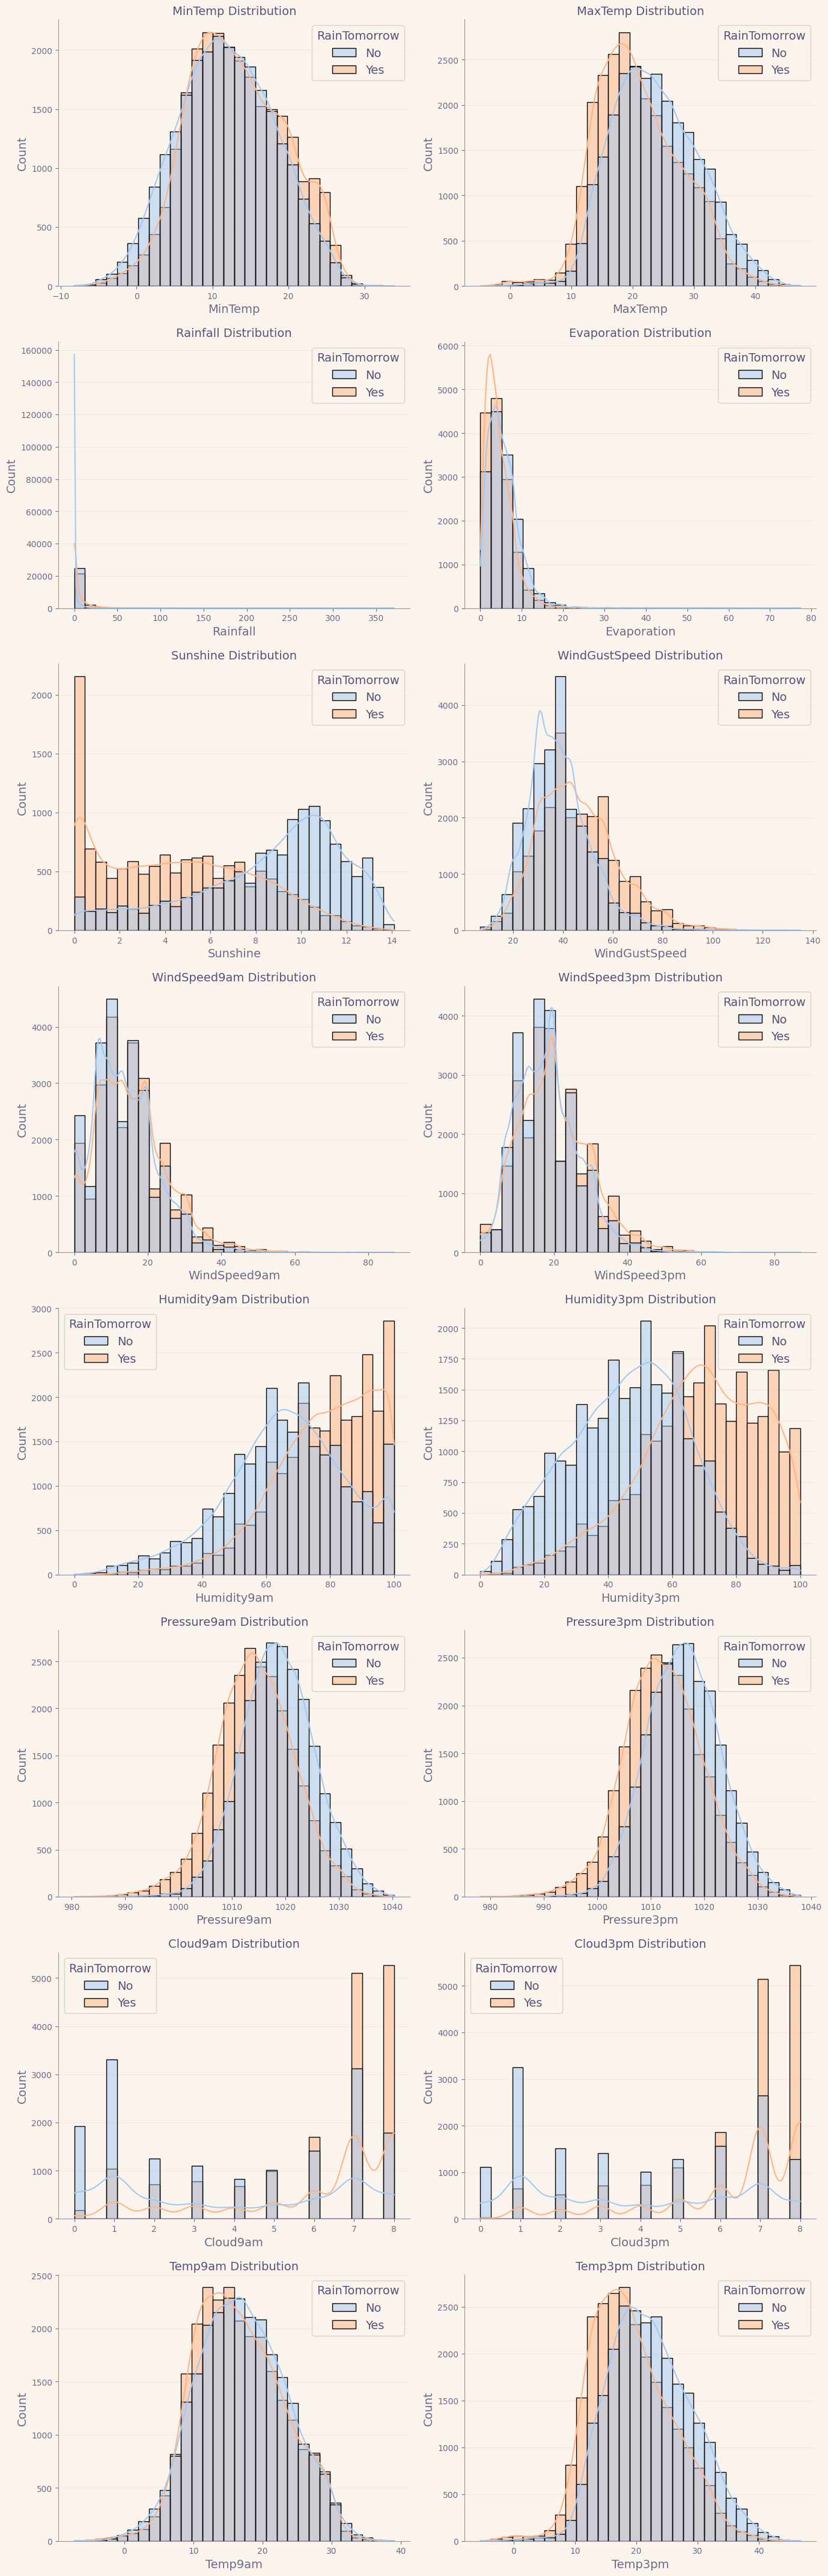

In [ ]:
plt.figure(figsize=(14,len(num_cols)*3))
for idx,column in enumerate(num_cols):
    plt.subplot(len(num_cols)//2+1,2,idx+1)
    sns.histplot(x=column, hue=target, data=df,bins=30,kde=True, palette="pastel")
    plt.title(f"{column} Distribution")
    plt.tight_layout()
    
    
plt.savefig("dist_num")  
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4c5ea2e6-f85f-4b21-bcf7-ad7216e62c07' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>